# Python 

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Answer1:
    
def max_freq_word_string(string):
    list1 = string.split()
    freq_word = {}
    for word in set(list1):
        freq_word[word] = list1.count(word)
    max_freq = 0
    max_wordfreq_length = 0
    for key,count in freq_word.items():
        if count>max_freq:
            max_freq = count
            max_wordfreq_length = len(key)
        elif count==max_freq & len(key)>max_wordfreq_length:
            max_wordfreq_length = len(key)

    return max_freq,max_wordfreq_length

test1 = "Hi Hi Hi how are are you you you you you doing?"
test2 = """This is is is is is is a test 2 of the assignment for checking checking the test case if if if it is working fine."""
max_freq,max_wordfreq_length = max_freq_word_string(test1)
print(max_freq,max_wordfreq_length)

max_freq,max_wordfreq_length = max_freq_word_string(test2)
print(max_freq,max_wordfreq_length)

5 3
7 2


In [3]:
# Answer 2:

from collections import Counter

def check_string(string):
    character_count = Counter(string) # Counting the occurence of each character inside a string
    char_freq_counts = Counter(character_count.values()) # counting the frequencies of each character counts
    if len(char_freq_counts) == 1:
        return "Yes"
    if len(char_freq_counts) > 1:
        return "No"
    frequency_list = list(char_freq_counts.items())
    if (frequency_list[0][1] == 1 and frequency_list[0][0] == 1) or (frequency_list[1][1] == 1 and frequency_list[1][0] == 1):
        return "Yes"
    else:
        return "No"

In [4]:
test_string1 = "aabbcc"
print(test_string1," - ",check_string(test_string1))
test_string2 = "aabbccc"
print(test_string2," - ",check_string(test_string2))


aabbcc  -  Yes
aabbccc  -  No


In [5]:
# Answer 3:

# df_ans3 = pd.read_json(r"https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json")

# Authentication is not provided to access this file from github.

In [6]:
# Answer 4:
from datetime import datetime

def format_datetime(string):
    if isinstance(string, str):
        return datetime.strptime(string, "%Y-%m-%dT%H:%M:%S.%f")
    else:
        return string

df_ans4 = pd.read_json("https://data.nasa.gov/resource/y77d-th95.json")

df_ans4 = pd.concat([df_ans4.drop(['geolocation'],axis=1),df_ans4['geolocation'].apply(pd.Series).iloc[:,1:]],axis=1)

df_ans4['year'] = df_ans4['year'].apply(lambda x: format_datetime(x))

df_ans4['year'] = pd.to_datetime(df_ans4['year'],errors='coerce')

In [7]:
df_ans4.dtypes

name                                   object
id                                      int64
nametype                               object
recclass                               object
mass                                  float64
fall                                   object
year                           datetime64[ns]
reclat                                float64
reclong                               float64
:@computed_region_cbhk_fwbd           float64
:@computed_region_nnqa_25f4           float64
coordinates                            object
type                                   object
dtype: object

In [8]:
# Answer 5:
import requests
def read_url(url):
    response = requests.get(url)
    if response.status_code==200:
        df = response.json()
        df_out = pd.DataFrame(df['_embedded']['episodes'])  #trying to retrive the nested episodes from the given link
        return df_out
    else:
        print('Failed to fetch the data from the given url : ',response.status_code)
        
df_ans5 = read_url("http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes")

In [9]:
df_ans5['airdate'] = pd.to_datetime(df_ans5['airdate'],format="%Y/%m/%d")
df_ans5['airtime'] = pd.to_datetime(df_ans5['airtime'],format='%H:%M').dt.strftime('%I:%M %p')
df_ans5['runtime'] = df_ans5['runtime'].astype(float)
df_ans5 = pd.concat([df_ans5.drop(columns=['rating']),df_ans5['rating'].apply(pd.Series).rename(columns={'average':'average_rating'})],axis=1)

from bs4 import BeautifulSoup
def withoutHTML_tags(string):
    text = BeautifulSoup(df_ans5['summary'][0])
    return text.get_text()

df_ans5['summary'] = df_ans5['summary'].apply(withoutHTML_tags)

df_ans5 = pd.concat([df_ans5.drop(columns=['image']),df_ans5['image'].apply(pd.Series).rename(columns={'medium':"medium_image_link",'original':"original_image_link"})],axis=1)

In [10]:
df_ans5.dtypes

id                              int64
url                            object
name                           object
season                          int64
number                          int64
type                           object
airdate                datetime64[ns]
airtime                        object
airstamp                       object
runtime                       float64
summary                        object
_links                         object
average_rating                float64
medium_image_link              object
original_image_link            object
dtype: object

In [ ]:
# Answer 6: Unable to fetch/access the data from Question 3.

In [12]:
# 7.a
meteorites_before_2000 = df_ans4.loc[(df_ans4['year']<'2000') & (df_ans4['fall']=='Fell')]
# 7.b
meteorites_co_ordinates_before_1970 = df_ans4.loc[(df_ans4['year']<'1970') & (df_ans4['fall']=='Fell'),['year','name','reclat','reclong','coordinates']]
meteorites_co_ordinates_before_1970 = meteorites_co_ordinates_before_1970.dropna().reset_index(drop=True)
# 7.c
meteorites_massGreater10000 = df_ans4.loc[df_ans4['mass']>10000]

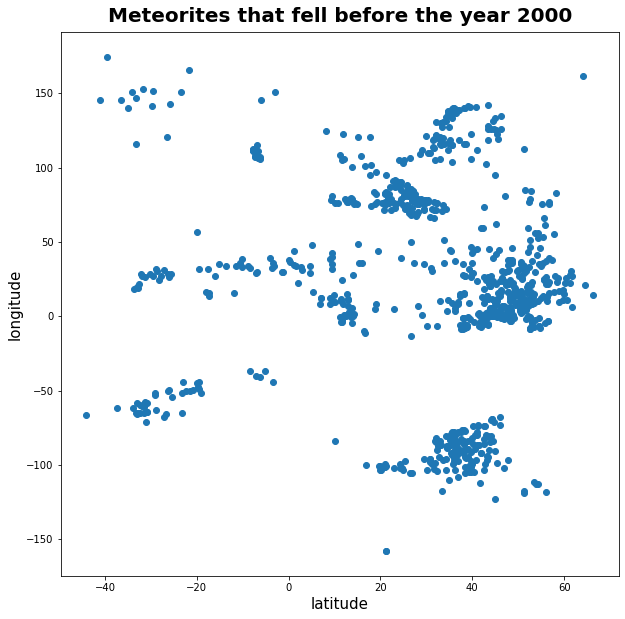

In [17]:
# 7.a

plt.figure(figsize=(10,10))
plt.xlabel("latitude",loc='center',fontdict={'fontsize':15,'fontweight':100})
plt.ylabel("longitude",loc='center',fontdict={'fontsize':15,'fontweight':100})
plt.title("Meteorites that fell before the year 2000",loc='center',pad=10,fontdict={'fontsize':20,'fontweight':900})
plt.scatter(meteorites_before_2000['reclat'],meteorites_before_2000['reclong'])

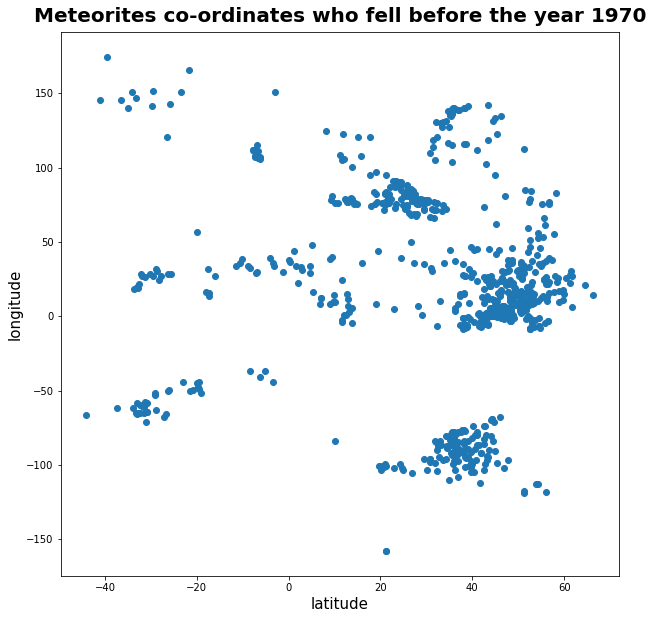

In [18]:
# 7.b

plt.figure(figsize=(10,10))
plt.xlabel("latitude",loc='center',fontdict={'fontsize':15,'fontweight':100})
plt.ylabel("longitude",loc='center',fontdict={'fontsize':15,'fontweight':100})
plt.title("Meteorites co-ordinates who fell before the year 1970",loc='center',pad=10,fontdict={'fontsize':20,'fontweight':900})
plt.scatter(meteorites_co_ordinates_before_1970['reclat'],meteorites_co_ordinates_before_1970['reclong'])

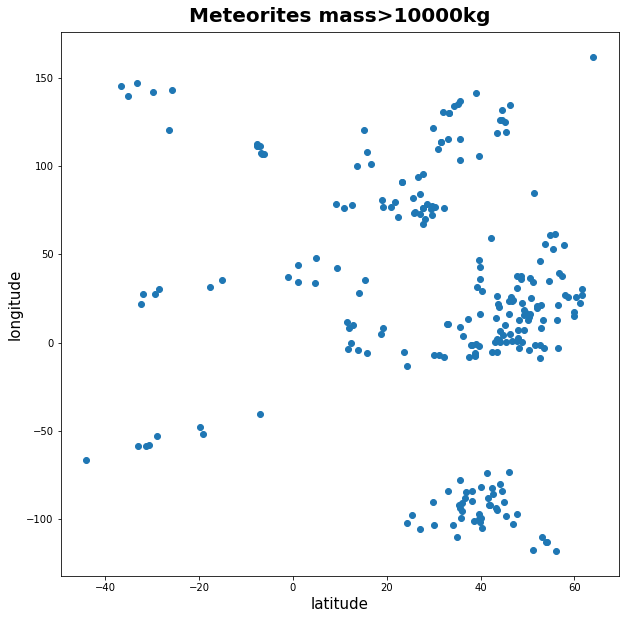

In [19]:
# 7.c

plt.figure(figsize=(10,10))
plt.xlabel("latitude",loc='center',fontdict={'fontsize':15,'fontweight':100})
plt.ylabel("longitude",loc='center',fontdict={'fontsize':15,'fontweight':100})
plt.title("Meteorites mass>10000kg",loc='center',pad=10,fontdict={'fontsize':20,'fontweight':900})
plt.scatter(meteorites_massGreater10000['reclat'],meteorites_massGreater10000['reclong'])

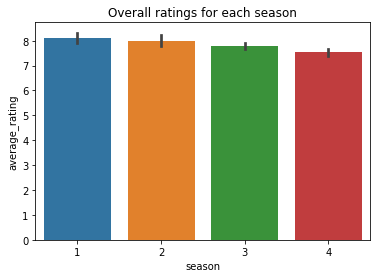

In [20]:
# Get all the overall ratings for each season and using plots compare the ratings for all the
# seasons, like season 1 ratings, season 2, and so on.

sns.barplot(x=df_ans5['season'],y=df_ans5['average_rating'])
plt.title('Overall ratings for each season')
plt.show()

In [21]:
# Get all the episode names, whose average rating is more than 8 for every season

average_rating_8 = set(df_ans5.loc[df_ans5['average_rating']>8,'name'])

In [22]:
# Get all the episode names that aired before May 2019

episode_before_may19 = set(df_ans5.loc[df_ans5['airdate']<'2019-05','name'])

In [23]:
# Get the episode name from each season with the highest and lowest rating

df_esp_hig_low_rating = pd.DataFrame(columns=['Episode_name','Season','Highest_rating','Lowest_rating'])
for name_ in set(df_ans5['name']):
    dfs = {}
    df = df_ans5.loc[df_ans5['name']==name_]
    for seas in set(df['season']):
        df_1 = df.loc[df['season']==seas]
        dfs['Episode_name'] = name_
        dfs['Season'] = seas
        dfs['Highest_rating'] = pd.Series(df_1['average_rating'].max())
        dfs['Lowest_rating'] = pd.Series(df_1['average_rating'].min())
    df_esp_hig_low_rating = pd.concat([df_esp_hig_low_rating,pd.DataFrame(dfs)],ignore_index=True).reset_index(drop=True)
    
df_esp_hig_low_rating = df_esp_hig_low_rating.sort_values(by=['Season']).reset_index(drop=True)

In [24]:
# Get the summary for the most popular ( ratings ) episode in every season

most_pop_esp = pd.DataFrame()
for seas in set(df_ans5['season']):
    dfs = {}
    df = df_ans5.loc[df_ans5['season']==seas]
    df = df.loc[df['average_rating']==df['average_rating'].max()][['name','season','average_rating','summary']]
    most_pop_esp = pd.concat([most_pop_esp,df],ignore_index=True).reset_index(drop=True)
    
most_pop_esp = most_pop_esp.sort_values(by=['season']).reset_index(drop=True)

In [25]:
url2 = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
df_ans9 = pd.read_csv(url2)

# Get all the cars and their types that do not qualify for clean alternative fuel vehicle

not_eligible_vehicle = df_ans9.loc[df_ans9['Clean Alternative Fuel Vehicle (CAFV) Eligibility']=='Not eligible due to low battery range'][['Make','Model','Electric Vehicle Type']].drop_duplicates().reset_index(drop=True)

# Get all TESLA cars with the model year, and model type made in Bothell City.

df_tesla_bothell = df_ans9.loc[(df_ans9['Make'] == 'TESLA') & (df_ans9['City'] == "Bothell")][['City','Model Year','Make','Model']].drop_duplicates().reset_index(drop=True)

# Get all the cars that have an electric range of more than 100, and were made after 2015

df_veh_100_2015 = df_ans9.loc[(df_ans9['Electric Range']>100) & (df_ans9['Model Year']>2015)].reset_index(drop=True)

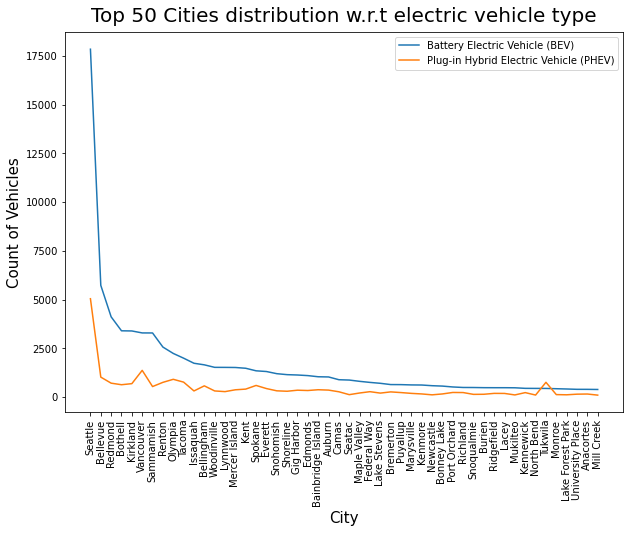

In [27]:
# Draw plots to show the distribution between city and electric vehicle type

df_city_vehType = pd.crosstab(df_ans9['City'],df_ans9['Electric Vehicle Type']).sort_values(by=['Battery Electric Vehicle (BEV)','Plug-in Hybrid Electric Vehicle (PHEV)'],ascending=[False,False])
top_50_city = df_city_vehType[:50]
top_50_city = top_50_city.reset_index()

plt.figure(figsize=(10,7))
sns.lineplot(data=top_50_city,x='City',y='Battery Electric Vehicle (BEV)')
sns.lineplot(data=top_50_city,x='City',y='Plug-in Hybrid Electric Vehicle (PHEV)',legend='auto')
plt.legend(["Battery Electric Vehicle (BEV)","Plug-in Hybrid Electric Vehicle (PHEV)"])
plt.xticks(rotation=90)
plt.ylabel('Count of Vehicles',loc='center',fontdict={'fontsize':15,'fontweight':100})
plt.xlabel('City',loc='center',fontdict={'fontsize':15,'fontweight':100})
plt.title("Top 50 Cities distribution w.r.t electric vehicle type",loc='center',pad=10,fontdict={'fontsize':20,'fontweight':500})
plt.show()

# Statistics

In [29]:
# Answer3:

df_data = pd.read_csv("data.csv")

bp_before_SD = df_data[' Blood Pressure Before (mmHg)'].std()
bp_after_SD = df_data[' Blood Pressure After (mmHg)'].std()
bp_range_before = df_data[' Blood Pressure Before (mmHg)'].max()-df_data[' Blood Pressure Before (mmHg)'].min()
bp_range_after = df_data[' Blood Pressure After (mmHg)'].max()-df_data[' Blood Pressure After (mmHg)'].min()

print('SD - BP before = ',round(bp_before_SD,2))
print('SD - BP after = ',round(bp_after_SD,2))
print('Range before = ',bp_range_before)
print('Range after = ',bp_range_after)
print("""
From the above SD we can understand that the 'BP before' column is deviating by 6.59 from the mean value and 
the 'BP after' column is deviating by 6.88 from the mean value which is slightly higher than the 'blood pressure before' column.
This means that there is variation in the reading taken in 'BP after' column.
""")

print("Mean value 'BP before' = ",df_data[' Blood Pressure Before (mmHg)'].mean())
print("Mean value 'BP after' = ",df_data[' Blood Pressure After (mmHg)'].mean())

SD - BP before =  6.6
SD - BP after =  6.89
Range before =  28
Range after =  23

From the above SD we can understand that the 'BP before' column is deviating by 6.59 from the mean value and 
the 'BP after' column is deviating by 6.88 from the mean value which is slightly higher than the 'blood pressure before' column.
This means that there is variation in the reading taken in 'BP after' column.

Mean value 'BP before' =  133.91
Mean value 'BP after' =  128.36


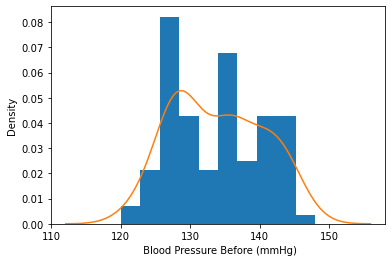

In [42]:
# Answer 6:

import matplotlib.pyplot as plt
import seaborn as sns

df_6 = pd.read_csv("data.csv")

# Blood pressure before

plt.hist(df_6[' Blood Pressure Before (mmHg)'],density=True)
sns.kdeplot(df_6[' Blood Pressure Before (mmHg)'])
plt.show()

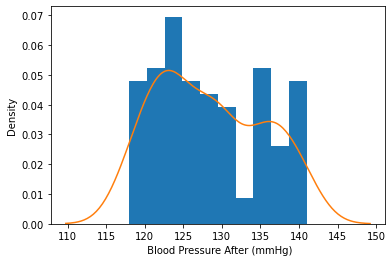

In [41]:
# Blood pressure after

plt.hist(df_6[' Blood Pressure After (mmHg)'],density=True)
sns.kdeplot(df_6[' Blood Pressure After (mmHg)'])
plt.show()

from the above two plot we can clearly say that the blood pressure follows a normal distribution.

In [33]:
# Answer 8: 
import numpy as np
from scipy.stats import wilcoxon

diff = [-3,-2,-2,-3,-1,-1,-2,-1,-2,-2]
alpha = 0.05
w,p = wilcoxon(diff)

if p < alpha:
    print("the therapy had a significant effect on anxiety levels!!")
else:
    print("the therapy did not had a significant effect on anxiety levels!!")

the therapy had a significant effect on anxiety levels!!


In [34]:
# Answer 9 :

dict_info = {'Name':['Karan','Deepa','Karthik','Chandan','Jeevan'],
             'Exam1':[85,70,90,75,95],
             'Exam2':[90,80,85,70,92],
             'Final Exam':[92,85,88,75,96]}
df_9 = pd.DataFrame(dict_info,columns=dict_info.keys())

Mean_val_exams = df_9[['Exam1', 'Exam2', 'Final Exam']].mean(axis=0)

# Comparing the mean scores of all the exams
if Mean_val_exams.nunique() == 1:
    print("Mean scores of all the students are same!")
else:
    print("Mean scores of the students are not same!")
    highest_score = Mean_val_exams.idxmax()
    Student_name = df_9['Name'][df_9[highest_score].idxmax()]
    print("The student with the highest score is : ", Student_name)

Mean scores of the students are not same!
The student with the highest score is :  Jeevan


In [35]:
# Answer 10:

from scipy.stats import binom
import math

Formula : P(X=r)= nCr*(p**r)*(q**(n−r))

In [36]:
def binomial_prob(n,r,p,type_prob=""):
    """
    n : Number of trials -> int
    r : Number of successes -> int
    p : Probability of success on a trial -> float
    
    type_prob : str --> 'exact' or 'atleast' or 'atmost'
    
    """
    
    if type_prob=='exact':
        P = binom.pmf(r,n,p)
        return P 
    elif type_prob=='atleast':
        r_value = list(range(0,r))
        p_rFORall = [binom.pmf(r,n,p) for r in r_value]
        sum_p = 0
        for i in p_rFORall:
            sum_p+=i
        P = 1-sum_p
        return P
    elif type_prob=='atmost':
        r_value = list(range(0,r+1))
        p_rFORall = [binom.pmf(r,n,p) for r in r_value]
        sum_p = 0
        for i in p_rFORall:
            sum_p+=i
        P = sum_p
        return P
    else:
        print("Enter the correct type_prob option to calculate the probability value!!\n Options :\n a.exact\n b.atleast\n c.atmost ")
        

In [37]:
ans10_a = binomial_prob(n=500,r=20,p=0.05,type_prob='exact')
print(f"a. The probability that exactly 20 bulbs are defective is : {ans10_a} or {round(ans10_a*100,2)}%")
ans10_b = binomial_prob(n=500,r=10,p=0.05,type_prob='atleast')
print(f"b. The probability that at least 10 bulbs are defective is : {ans10_b} or {round(ans10_b*100,2)}%")
ans10_c = binomial_prob(n=500,r=15,p=0.05,type_prob='atmost')
print(f"c. The probability that at max 15 bulbs are defective is : {ans10_c} or {round(ans10_c*100,2)}%")
ans10_d = round(500*0.05,0)
print(f"d. On an average defective bulbs would be in a batch of 500 is : {int(ans10_d)}")

a. The probability that exactly 20 bulbs are defective is : 0.051616192536642215 or 5.16%
b. The probability that at least 10 bulbs are defective is : 0.9998316463654902 or 99.98%
c. The probability that at max 15 bulbs are defective is : 0.01985837716299719 or 1.99%
d. On an average defective bulbs would be in a batch of 500 is : 25


In [38]:
# Answer 11: 

df_ans11 = pd.read_csv("data.csv")

<AxesSubplot:xlabel=' Blood Pressure Before (mmHg)', ylabel='Density'>

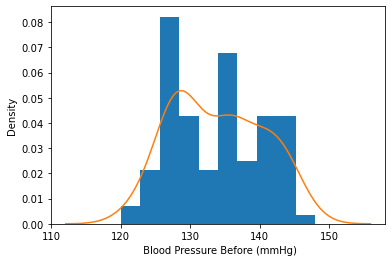

In [45]:
plt.hist(df_ans11[' Blood Pressure Before (mmHg)'],density=True)
sns.kdeplot(df_ans11[' Blood Pressure Before (mmHg)'])

<AxesSubplot:xlabel=' Blood Pressure After (mmHg)', ylabel='Density'>

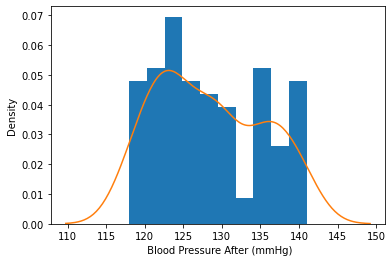

In [47]:
plt.hist(df_ans11[' Blood Pressure After (mmHg)'],density=True)
sns.kdeplot(df_ans11[' Blood Pressure After (mmHg)'])

In [48]:
# Answer 12:

<img src="https://www.statsdirect.co.uk/help/generatedimages/equations/equation167.svg" alt="Alternative text" />

In [76]:
# a.
H0 ="there is no significant difference between the means"
H1 = "there is significant difference between the means"
x1_mean = 2.5
x2_mean = 2.2
sd_A = 0.8
sd_B = 0.6
n_A = 30
n_B = 30
alpha = 0.05/2
degree_of_freedom = (n_A+n_B-2)
t = (x1_mean-x2_mean)/(np.sqrt((sd_A**2)/30+(sd_B**2)/30))

# we get the critical_value around 2.001
critical_value = 2.001

if t<critical_value:
    print("We fail to reject the null hypothesis!")
else:
    print("We reject the null hypothesis!")

We fail to reject the null hypothesis!


b. Based on the t-test results, state whether the null hypothesis should be
rejected or not. Provide a conclusion in the context of the study.


Based on the t test result above we can say that there is no significant
difference in the mean improvement scores between the two groups at 0.05 significance level for treating a particular condition. Hence we fail to reject the null hypothesis!

# Machine learning

In [85]:
# Answer 1:

dfML_ans1 = pd.read_csv('instagram_reach.csv')

dfML_ans1['Time since posted'] = dfML_ans1['Time since posted'].str.replace(" hours","_hrs")

dfML_ans1 = pd.concat([dfML_ans1,pd.get_dummies(dfML_ans1['Time since posted'])],axis=1)

In [101]:
dfML_ans1['Hashtags'].nunique()

98

In [102]:
dfML_ans1 = dfML_ans1.drop(columns=['Unnamed: 0', 'S.No', 'USERNAME', 'Caption','Hashtags','Time since posted',])

In [103]:
dfML_ans1

,Followers,Likes,11_hrs,14_hrs,20_hrs,24_hrs,2_hrs,3_hrs,4_hrs,5_hrs,7_hrs,8_hrs,9_hrs
0,1600,139,1,0,0,0,0,0,0,0,0,0,0
1,880,23,0,0,0,0,1,0,0,0,0,0,0
2,255,25,0,0,0,0,1,0,0,0,0,0,0
3,340,49,0,0,0,0,0,1,0,0,0,0,0
4,304,30,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,614,31,0,0,0,0,0,1,0,0,0,0,0
96,450,42,0,0,0,0,0,1,0,0,0,0,0
97,182,10,0,0,0,0,0,1,0,0,0,0,0
98,2039,222,0,0,0,0,0,1,0,0,0,0,0
